In [2]:
# Import libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer, KNNImputer

# GPT
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# pandas tricks for better display
pd.options.display.max_columns = 50  
pd.options.display.max_rows = 500     
pd.options.display.max_colwidth = 100
pd.options.display.precision = 3

In [3]:
# Load the datasets
df = pd.read_csv("data/data.csv", index_col = 0)
df.head()

/var/folders/mv/qjf0qtbx7dj3qb0zkxw0d4d40000gn/T/ipykernel_16095/2013055878.py:2: DtypeWarning: Columns (56,58) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/data.csv", index_col = 0)


,web-scraper-order,web-scraper-start-url,course,comments,year,term,course_title,course_number1,department1,course_number2,department2,name_key1,instructor_first_name,instructor_last_name,enrollment,responses,number_of_comments,Course_Overall_Rating,Course_Materials_Rating,Course_Assignments_Rating,Course_Feedback_Rating,Course_Section_Rating,Course_Workload_Rating,Course_Goals_Rating,Course_Recommend_Rating,...,Course_Recommend_Respondents,Course_Money_Respondents,Instructor_Return_Respondents,Instructor_Feedback_Respondents,Instructor_Participation_Respondents,Instructor_Enthusiasm_Respondents,Instructor_Accessible_Respondents,Instructor_Lectures_Respondents,Instructor_Overall_Respondents,Course_Overall_Distribution,Course_Materials_Distribution,Course_Assignments_Distribution,Course_Feedback_Distribution,Course_Section_Distribution,Course_Workload_Distribution,Course_Goals_Distribution,Course_Recommend_Distribution,Course_Money_Distribution,Instructor_Return_Distribution,Instructor_Feedback_Distribution,Instructor_Participation_Distribution,Instructor_Enthusiasm_Distribution,Instructor_Accessible_Distribution,Instructor_Lectures_Distribution,Instructor_Overall_Distribution
0,1522891683-18234,https://course-evaluation-reports.fas.harvard.edu/fas/list?yearterm=2006_1,AFRAMER 112: Black Humor: Performance Art and Literature,[],2006,fall,Black Humor: Performance Art and Literature,112,AFRAMER,NaN,NaN,AFRAMER 112,"""","""",45,21,0,4.1,4.4,3.8,3.6,4.0,3.0,NaN,4.2,...,21.0,NaN,7.0,9.0,19.0,20.0,20.0,20.0,20.0,"[1, 3, 0, 6, 11]","[0, 1, 2, 5, 13]","[1, 3, 1, 9, 6]","[2, 4, 2, 5, 8]","[1, 1, 3, 8, 7]","[9, 11, 1, 0, 0]",NaN,"[3, 1, 0, 2, 15]",NaN,"[0, 1, 2, 2, 15]","[0, 1, 2, 7, 10]","[0, 0, 1, 3, 16]","[0, 0, 3, 1, 16]","[0, 0, 2, 3, 14]","[1, 0, 1, 4, 3]","[0, 0, 1, 3, 3]"
1,1522891674-18223,https://course-evaluation-reports.fas.harvard.edu/fas/list?yearterm=2006_1,"AFRAMER 113: Fictions of Race, Facts of Racism: Perspectives from South African and African Ame...",[],2006,fall,"Fictions of Race, Facts of Racism: Perspectives from South African and African American Drama an...",113,AFRAMER,NaN,NaN,AFRAMER 113,NaN,NaN,0,[],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1522891670-18217,https://course-evaluation-reports.fas.harvard.edu/fas/list?yearterm=2006_1,AFRAMER 116: Autobiography and Literary Imagination,[],2006,fall,Autobiography and Literary Imagination,116,AFRAMER,NaN,NaN,AFRAMER 116,"""","""",9,5,0,4.5,4.2,3.8,3.2,3.8,10.0,NaN,4.8,...,4.0,NaN,3.0,3.0,4.0,4.0,4.0,4.0,4.0,"[0, 0, 0, 2, 2]","[0, 0, 0, 3, 1]","[0, 1, 1, 0, 2]","[1, 1, 0, 0, 2]","[1, 0, 0, 1, 2]","[0, 0, 2, 2, 0]",NaN,"[0, 0, 0, 1, 3]",NaN,"[0, 0, 0, 2, 2]","[0, 1, 0, 1, 2]","[0, 0, 1, 2, 1]","[0, 0, 0, 1, 3]","[0, 1, 0, 0, 3]","[0, 1, 0, 0, 2]","[0, 1, 0, 0, 2]"
3,1522891657-18200,https://course-evaluation-reports.fas.harvard.edu/fas/list?yearterm=2006_1,AFRAMER 175: Introduction to African Music,[],2006,fall,Introduction to African Music,175,AFRAMER,NaN,NaN,AFRAMER 175,"""","""",14,13,0,4.4,4.1,3.7,4.0,4.0,5.0,NaN,4.7,...,13.0,NaN,10.0,12.0,10.0,13.0,9.0,12.0,13.0,"[0, 1, 2, 1, 9]","[0, 1, 1, 7, 4]","[0, 1, 4, 6, 2]","[0, 1, 3, 4, 5]","[0, 0, 0, 1, 0]","[2, 7, 4, 0, 0]",NaN,"[0, 0, 0, 4, 9]",NaN,"[0, 0, 1, 3, 9]","[0, 0, 2, 3, 7]","[0, 1, 5, 1, 2]","[0, 0, 1, 4, 8]","[0, 1, 0, 3, 6]","[0, 2, 2, 6, 2]","[0, 1, 3, 4, 2]"
4,1522891495-18013,https://course-evaluation-reports.fas.harvard.edu/fas/list?yearterm=2006_1,"AFRAMER 190: African-American Families: Politics, Culture, Experience",[],2006,fall,"African-American Families: Politics, Culture, Experience",190,AFRAMER,NaN,NaN,AFRAMER 190,"""","""",13,8,0,4.4,4.4,4.1,4.1,0.0,3.0,NaN,4.4,...,7.0,NaN,6.0,6.0,7.0,7.0,6.0,7.0,7.0,"[0, 0, 1, 2, 4]","[0, 0, 0, 4, 3]","[0, 1, 0, 3, 3]","[0, 1, 0, 3, 3]",[],"[2, 5, 0, 0, 0]",NaN,"[0, 0, 1, 2, 4]",NaN,"[0, 0, 1, 2, 4]","[0, 0, 1, 4, 2]","[0, 1, 1, 0, 4]","[0, 0, 1, 3, 3]","[0, 0, 1,

Creating a new column for 'department' in df.copy 

In [4]:
df_copy = df.copy()

course_department_map = {
    'AFRIKAAN': 'arts_humanities',
    'AKKAD': 'arts_humanities',
    'AMHARIC': 'arts_humanities',
    'AMSTDIES': 'arts_humanities',
    'AM_CIV': 'arts_humanities',
    'ANE': 'arts_humanities',
    'ARABIC': 'arts_humanities',
    'ARAMAIC': 'arts_humanities',
    'ARMEN': 'arts_humanities',
    'ARMENST': 'arts_humanities',
    'BCS': 'arts_humanities',
    'CAMEROON': 'arts_humanities',
    'CATALAN': 'arts_humanities',
    'CELTIC': 'arts_humanities',
    'CHAG': 'arts_humanities',
    'CHNSE': 'arts_humanities',
    'CHNSHIS': 'arts_humanities',
    'CHNSLIT': 'arts_humanities',
    'CL': 'arts_humanities',
    'CLASARCH': 'arts_humanities',
    'CLASSIC': 'arts_humanities',
    'CLAS-HEB': 'arts_humanities',
    'CLASPHIL': 'arts_humanities',
    'CLS-STDY': 'arts_humanities',
    'COMPLIT': 'arts_humanities',
    'CZCH': 'arts_humanities',
    'DRAMA': 'arts_humanities',
    'DUTCH': 'arts_humanities',
    'EABS': 'arts_humanities',
    'EAFM': 'arts_humanities',
    'EGYPTIAN': 'arts_humanities',
    'EASTD': 'arts_humanities',
    'ENGLISH': 'arts_humanities',
    'FOLKMYTH': 'arts_humanities',
    'FOR-CULT': 'arts_humanities',
    'FRENCH': 'arts_humanities',
    'GERMAN': 'arts_humanities',
    'GERMPHIL': 'arts_humanities',
    'GERM-STD': 'arts_humanities',
    'GIKUYU': 'arts_humanities',
    'GREEK': 'arts_humanities',
    'GULLAH': 'arts_humanities',
    'HAA': 'arts_humanities',
    'HAITIAN': 'arts_humanities',
    'HAUSA': 'arts_humanities',
    'HEBREW': 'arts_humanities',
    'HIND-URD': 'arts_humanities',
    'HINDI': 'arts_humanities',
    'HIS-STD': 'arts_humanities',
    'HIST': 'arts_humanities',
    'HIST-LIT': 'arts_humanities',
    'HUMAN': 'arts_humanities',
    'HUMFRAME': 'arts_humanities',
    'HUMQSTNS': 'arts_humanities',
    'IGBO': 'arts_humanities',
    'INDN-ST': 'arts_humanities',
    'IRANCIV': 'arts_humanities',
    'IRANIAN': 'arts_humanities',
    'IRISH': 'arts_humanities',
    'ISLAMCIV': 'arts_humanities',
    'ITAL': 'arts_humanities',
    'JAMAICAN': 'arts_humanities',
    'JAPAN': 'arts_humanities',
    'JAPNHIST': 'arts_humanities',
    'JAPNLIT': 'arts_humanities',
    'JEWISHST': 'arts_humanities',
    'KINYARWA': 'arts_humanities',
    'KOREAN': 'arts_humanities',
    'KORHIST': 'arts_humanities',
    'KORLIT': 'arts_humanities',
    'LATIN': 'arts_humanities',
    'LAT-STD': 'arts_humanities',
    'LING': 'arts_humanities',
    'LIT': 'arts_humanities',
    'LIT-ART': 'arts_humanities',
    'LITER': 'arts_humanities',
    'LITERTRE': 'arts_humanities',
    'MALAGASI': 'arts_humanities',
    'MANCHU': 'arts_humanities',
    'MEDGREEK': 'arts_humanities',
    'MEDLATIN': 'arts_humanities',
    'MEDVLSTD': 'arts_humanities',
    'MES': 'arts_humanities',
    'MOD-HEB': 'arts_humanities',
    'MODGRK': 'arts_humanities',
    'MODMDEST': 'arts_humanities',
    'MONGOLN': 'arts_humanities',
    'MUSIC': 'arts_humanities',
    'NEC': 'arts_humanities',
    'NEP': 'arts_humanities',
    'NKO': 'arts_humanities',
    'NORWGN': 'arts_humanities',
    'PAL': 'arts_humanities',
    'PERSIAN': 'arts_humanities',
    'PHIL': 'arts_humanities',
    'PLSH': 'arts_humanities',
    'PORTUG': 'arts_humanities',
    'PULAAR': 'arts_humanities',
    'RELIGION': 'arts_humanities',
    'ROM-LANG': 'arts_humanities',
    'ROM-STD': 'arts_humanities',
    'RSRA': 'arts_humanities',
    'RUSS': 'arts_humanities',
    'SALLC': 'arts_humanities',
    'SANSKRIT': 'arts_humanities',
    'SANSKRT': 'arts_humanities',
    'SAS': 'arts_humanities',
    'SCAND': 'arts_humanities',
    'SCTGALIC': 'arts_humanities',
    'SEMPHIL': 'arts_humanities',
    'SHONA': 'arts_humanities',
    'SLAVIC': 'arts_humanities',
    'SOMALI': 'arts_humanities',
    'SPANSH': 'arts_humanities',
    'SUDANESE': 'arts_humanities',
    'SWAHILI': 'arts_humanities',
    'SWEDISH': 'arts_humanities',
    'TAM': 'arts_humanities',
    'TDM': 'arts_humanities',
    'THI': 'arts_humanities',
    'TIBET': 'arts_humanities',
    'TIBETAN': 'arts_humanities',
    'TIBHIST': 'arts_humanities',
    'TIGRINYA': 'arts_humanities',
    'TURKISH': 'arts_humanities',
    'TWI': 'arts_humanities',
    'UKRA': 'arts_humanities',
    'UKRAN': 'arts_humanities',
    'URD': 'arts_humanities',
    'URDU': 'arts_humanities',
    'UYGHUR': 'arts_humanities',
    'VES': 'arts_humanities',
    'VIETNAM': 'arts_humanities',
    'WELSH': 'arts_humanities',
    'WOLOF': 'arts_humanities',
    'WSTAFRCN': 'arts_humanities',
    'YIDDISH': 'arts_humanities',
    'YORUBA': 'arts_humanities',
    'ZULU': 'arts_humanities',

    'APCOMP': 'stem',
    'APMTH': 'stem',
    'APPHY': 'stem',
    'ASTRON': 'stem',
    'BBS': 'stem',
    'BCMP': 'stem',
    'BE': 'stem',
    'BIOCHSCI': 'stem',
    'BIOLOGY': 'stem',
    'BIOLSCI': 'stem',
    'BIOPHYS': 'stem',
    'BIOSTAT': 'stem',
    'BPH': 'stem',
    'BSDM': 'stem',
    'CELLBIO': 'stem',
    'CHEM': 'stem',
    'CHEMBIO': 'stem',
    'COMPSCI': 'stem',
    'CPB': 'stem',
    'DRB': 'stem',
    'E-PSCI': 'stem',
    'ENG-SCI': 'stem',
    'GENETIC': 'stem',
    'HBTM': 'stem',
    'HEB': 'stem',
    'IMMUN': 'stem',
    'IMUIL': 'stem',
    'LIFESCI': 'stem',
    'LPS': 'stem',
    'MATH': 'stem',
    'MBB': 'stem',
    'MCB': 'stem',
    'MED_SCI': 'stem',
    'MICROBI': 'stem',
    'NEURO': 'stem',
    'NEUROBIO': 'stem',
    'OEB': 'stem',
    'PATHOL': 'stem',
    'PHS': 'stem',
    'PHYSCI': 'stem',
    'PHYSICS': 'stem',
    'SCIENCE': 'stem',
    'SCRB': 'stem',
    'SHBT': 'stem',
    'STAT': 'stem',
    'SYSBIO': 'stem',
    'SYSTBIO': 'stem',
    'VIROLOGY': 'stem',
    

    'AFRAMER': 'social_science',
    'ANTHRO': 'social_science',
    'BUSSTUD': 'social_science',
    'ECON': 'social_science',
    'ESPP': 'social_science',
    'EDC': 'social_science',
    'EMR': 'social_science',
    'GHHP': 'social_science',
    'GOV': 'social_science',
    'HISTSCI': 'social_science',
    'HLTHPOL': 'social_science',
    'HSEMR-CU': 'social_science',
    'HSEMR-EL': 'social_science',
    'HSEMR-LE': 'social_science',
    'HSEMR-LO': 'social_science',
    'HSEMR-MA': 'social_science',
    'HSEMR-PF': 'social_science',
    'HSEMR-WI': 'social_science',
    'PSY': 'social_science',
    'SOC-ANAL': 'social_science',
    'SOC-STD': 'social_science',
    'SOCIOL': 'social_science',
    'SPOL': 'social_science',
    'WOMGEN': 'social_science',
    'WOM-STD': 'social_science',

    'EXPOS': 'expository',

    'FRSEMR': 'first_year',

    'AESTHINT': 'general_education',
    'CULTBLF': 'general_education',
    'GEN-ED': 'general_education',
    'EMREAS': 'general_education',
    'ETHRSON': 'general_education',
    'MOR-REAS': 'general_education',
    'QNT-REAS': 'general_education',
    'SCILIVSY': 'general_education',
    'SCIPHUNV': 'general_education',
    'SOCWORLD': 'general_education',
    'US-WORLD': 'general_education',

    'UNKNOWN': 'misc'

    
}

df_copy['department'] = np.vectorize(course_department_map.get)(df_copy['department1'])
df_copy.head()

,web-scraper-order,web-scraper-start-url,course,comments,year,term,course_title,course_number1,department1,course_number2,department2,name_key1,instructor_first_name,instructor_last_name,enrollment,responses,number_of_comments,Course_Overall_Rating,Course_Materials_Rating,Course_Assignments_Rating,Course_Feedback_Rating,Course_Section_Rating,Course_Workload_Rating,Course_Goals_Rating,Course_Recommend_Rating,...,Course_Money_Respondents,Instructor_Return_Respondents,Instructor_Feedback_Respondents,Instructor_Participation_Respondents,Instructor_Enthusiasm_Respondents,Instructor_Accessible_Respondents,Instructor_Lectures_Respondents,Instructor_Overall_Respondents,Course_Overall_Distribution,Course_Materials_Distribution,Course_Assignments_Distribution,Course_Feedback_Distribution,Course_Section_Distribution,Course_Workload_Distribution,Course_Goals_Distribution,Course_Recommend_Distribution,Course_Money_Distribution,Instructor_Return_Distribution,Instructor_Feedback_Distribution,Instructor_Participation_Distribution,Instructor_Enthusiasm_Distribution,Instructor_Accessible_Distribution,Instructor_Lectures_Distribution,Instructor_Overall_Distribution,department
0,1522891683-18234,https://course-evaluation-reports.fas.harvard.edu/fas/list?yearterm=2006_1,AFRAMER 112: Black Humor: Performance Art and Literature,[],2006,fall,Black Humor: Performance Art and Literature,112,AFRAMER,NaN,NaN,AFRAMER 112,"""","""",45,21,0,4.1,4.4,3.8,3.6,4.0,3.0,NaN,4.2,...,NaN,7.0,9.0,19.0,20.0,20.0,20.0,20.0,"[1, 3, 0, 6, 11]","[0, 1, 2, 5, 13]","[1, 3, 1, 9, 6]","[2, 4, 2, 5, 8]","[1, 1, 3, 8, 7]","[9, 11, 1, 0, 0]",NaN,"[3, 1, 0, 2, 15]",NaN,"[0, 1, 2, 2, 15]","[0, 1, 2, 7, 10]","[0, 0, 1, 3, 16]","[0, 0, 3, 1, 16]","[0, 0, 2, 3, 14]","[1, 0, 1, 4, 3]","[0, 0, 1, 3, 3]",social_science
1,1522891674-18223,https://course-evaluation-reports.fas.harvard.edu/fas/list?yearterm=2006_1,"AFRAMER 113: Fictions of Race, Facts of Racism: Perspectives from South African and African Ame...",[],2006,fall,"Fictions of Race, Facts of Racism: Perspectives from South African and African American Drama an...",113,AFRAMER,NaN,NaN,AFRAMER 113,NaN,NaN,0,[],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,social_science
2,1522891670-18217,https://course-evaluation-reports.fas.harvard.edu/fas/list?yearterm=2006_1,AFRAMER 116: Autobiography and Literary Imagination,[],2006,fall,Autobiography and Literary Imagination,116,AFRAMER,NaN,NaN,AFRAMER 116,"""","""",9,5,0,4.5,4.2,3.8,3.2,3.8,10.0,NaN,4.8,...,NaN,3.0,3.0,4.0,4.0,4.0,4.0,4.0,"[0, 0, 0, 2, 2]","[0, 0, 0, 3, 1]","[0, 1, 1, 0, 2]","[1, 1, 0, 0, 2]","[1, 0, 0, 1, 2]","[0, 0, 2, 2, 0]",NaN,"[0, 0, 0, 1, 3]",NaN,"[0, 0, 0, 2, 2]","[0, 1, 0, 1, 2]","[0, 0, 1, 2, 1]","[0, 0, 0, 1, 3]","[0, 1, 0, 0, 3]","[0, 1, 0, 0, 2]","[0, 1, 0, 0, 2]",social_science
3,1522891657-18200,https://course-evaluation-reports.fas.harvard.edu/fas/list?yearterm=2006_1,AFRAMER 175: Introduction to African Music,[],2006,fall,Introduction to African Music,175,AFRAMER,NaN,NaN,AFRAMER 175,"""","""",14,13,0,4.4,4.1,3.7,4.0,4.0,5.0,NaN,4.7,...,NaN,10.0,12.0,10.0,13.0,9.0,12.0,13.0,"[0, 1, 2, 1, 9]","[0, 1, 1, 7, 4]","[0, 1, 4, 6, 2]","[0, 1, 3, 4, 5]","[0, 0, 0, 1, 0]","[2, 7, 4, 0, 0]",NaN,"[0, 0, 0, 4, 9]",NaN,"[0, 0, 1, 3, 9]","[0, 0, 2, 3, 7]","[0, 1, 5, 1, 2]","[0, 0, 1, 4, 8]","[0, 1, 0, 3, 6]","[0, 2, 2, 6, 2]","[0, 1, 3, 4, 2]",social_science
4,1522891495-18013,https://course-evaluation-reports.fas.harvard.edu/fas/list?yearterm=2006_1,"AFRAMER 190: African-American Families: Politics, Culture, Experience",[],2006,fall,"African-American Families: Politics, Culture, Experience",190,AFRAMER,NaN,NaN,AFRAMER 190,"""","""",13,8,0,4.4,4.4,4.1,4.1,0.0,3.0,NaN,4.4,...,NaN,6.0,6.0,7.0,7.0,6.0,7.0,7.0,"[0, 0, 1, 2, 4]","[0, 0, 0, 4, 3]","[0, 1, 0, 3, 3]","[0, 1, 0, 3, 3]",[],"[2, 5, 0, 0, 0]",NaN,"[0, 0, 1, 2, 4]",NaN,"[0, 0, 1, 2, 4]","[0, 0, 1, 4, 2]","[0, 1, 1, 0, 4]","[0, 0, 

Step 1: Exploratory Data Analysis

In [19]:
average_enrollment = df_copy.groupby('department')['enrollment'].mean().reset_index()
average_enrollment

,department,enrollment
0,None,51.606
1,arts_humanities,15.059
2,expository,26.489
3,first_year,9.311
4,general_education,72.102
5,misc,5.333
6,social_science,24.021
7,stem,29.000


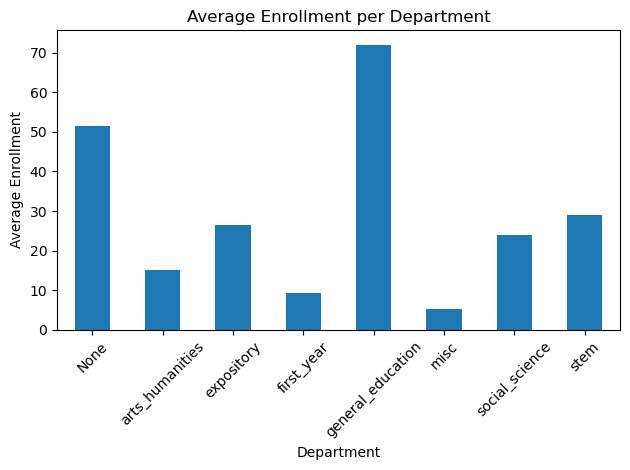

In [21]:
# Plot the average enrollment per department as a bar chart
average_enrollment.plot(kind='bar', x='department', y='enrollment', legend=False)

# Set the title and labels
plt.title('Average Enrollment per Department')
plt.xlabel('Department')
plt.ylabel('Average Enrollment')
plt.xticks(rotation=45)  # Rotate the x-axis labels to show them better

# Show the plot
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()

Text(0, 0.5, 'Total Enrollment')

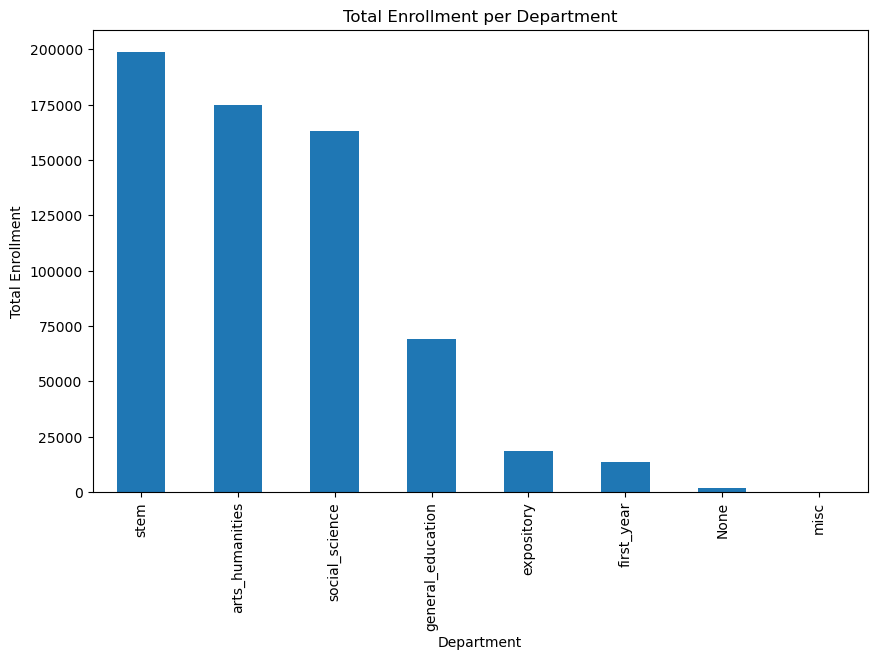

In [22]:
total_enrollment = df_copy.groupby('department')['enrollment'].sum().sort_values(ascending=False)

# Plotting the total enrollment per department as a bar chart
total_enrollment.plot(kind='bar', figsize=(10, 6))

# Adding title and labels
plt.title('Total Enrollment per Department')
plt.xlabel('Department')
plt.ylabel('Total Enrollment')

Step 2: Look at the missing data and drop columns with >50 of the data missing

In [5]:
# Calculate the percentage of missing values for each column
missing_percentage = df.isnull().mean() * 100

# Display the percentage of missing data by column
missing_percentage.sort_values(ascending=False)

Course_Goals_Rating                      99.996
Course_Goals_Distribution                99.996
Course_Goals_Respondents                 99.996
course_number2                           99.060
department2                              99.060
Course_Money_Distribution                91.721
Course_Money_Respondents                 91.718
Course_Money_Rating                      91.718
Instructor_Return_Distribution           34.960
Instructor_Return_Respondents            34.960
Instructor_Return_Rating                 34.960
Instructor_Enthusiasm_Distribution       33.097
Instructor_Enthusiasm_Respondents        33.097
Instructor_Enthusiasm_Rating             33.097
Instructor_Overall_Rating                29.632
Instructor_Overall_Respondents           29.632
Instructor_Overall_Distribution          29.632
Instructor_Accessible_Rating             29.622
Instructor_Participation_Respondents     29.622
Instructor_Accessible_Respondents        29.622
Instructor_Lectures_Distribution        

In [6]:
# TODO: Does this seem okay
# Remove columns with more than 50% missing values
columns_to_drop = missing_percentage[missing_percentage > 50].index
data_cleaned = df.drop(columns=columns_to_drop)

# Show the shape of the data before and after
original_shape = df.shape
cleaned_shape = data_cleaned.shape

original_shape, cleaned_shape, columns_to_drop.tolist()

((28398, 65),
 (28398, 57),
 ['course_number2',
  'department2',
  'Course_Goals_Rating',
  'Course_Money_Rating',
  'Course_Goals_Respondents',
  'Course_Money_Respondents',
  'Course_Goals_Distribution',
  'Course_Money_Distribution'])

In [7]:
# Identify the data types of the remaining columns
column_data_types = data_cleaned.dtypes

# Separate columns by data type for potential different imputation methods
categorical_columns = column_data_types[column_data_types == 'object'].index.tolist()
numerical_columns = column_data_types[column_data_types != 'object'].index.tolist()

# Show the data types of the remaining columns
column_data_types

web-scraper-order                         object
web-scraper-start-url                     object
course                                    object
comments                                  object
year                                       int64
term                                      object
course_title                              object
course_number1                            object
department1                               object
name_key1                                 object
instructor_first_name                     object
instructor_last_name                      object
enrollment                                 int64
responses                                 object
number_of_comments                         int64
Course_Overall_Rating                    float64
Course_Materials_Rating                  float64
Course_Assignments_Rating                float64
Course_Feedback_Rating                   float64
Course_Section_Rating                    float64
Course_Workload_Rati

Step 3: Imputer values

In [8]:
# TODO: Check impute
# Impute missing values for numerical columns with median
num_imputer = SimpleImputer(strategy='median')
data_cleaned[numerical_columns] = num_imputer.fit_transform(data_cleaned[numerical_columns])

# Impute missing values for categorical columns with mode
cat_imputer = SimpleImputer(strategy='most_frequent')
data_cleaned[categorical_columns] = cat_imputer.fit_transform(data_cleaned[categorical_columns])

Step 4: Train-test split

In [9]:
# Convert the 'year' column back to integers (after imputation it was converted to float)
data_cleaned['year'] = data_cleaned['year'].astype('int64')

# Split the data into training and test sets
train_data = data_cleaned[(data_cleaned['year'] >= 2006) & (data_cleaned['year'] <= 2016)]
test_data = data_cleaned[(data_cleaned['year'] == 2017) | (data_cleaned['year'] == 2018)]

# Check the shape of the train and test sets
train_shape = train_data.shape
test_shape = test_data.shape

train_shape, test_shape

((24691, 57), (3707, 57))

In [10]:
# Define the features and target variable for the training data
X_train = train_data.drop('enrollment', axis=1)  # Features
y_train = train_data['enrollment']  # Target variable

In [11]:
# Define categorical and numerical features
categorical_features = X_train.select_dtypes(include=['object', 'bool']).columns.tolist()
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_features.remove('year')  # We exclude 'year' since it's not a predictive feature

# TODO: Check pipelines
# Create the preprocessing pipelines for both numerical and categorical data
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())  # Adding scaler to numerical features
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # OneHotEncode categorical features
])

# Combine preprocessing steps into a single ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ])

Step 5: Create the model

In [12]:
# Create a preprocessing and modelling pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', RandomForestRegressor(random_state=42))])

# Split the training data again into training and validation sets
X_train_sub, X_valid, y_train_sub, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Fit the model (the Random Forest Regressor) on the training subset
model.fit(X_train_sub, y_train_sub)

# Predict on the validation set
y_pred_valid = model.predict(X_valid)

# Calculate the root mean squared error (RMSE) on the validation set
rmse_valid = mean_squared_error(y_valid, y_pred_valid, squared=False)

rmse_valid

6.284013919258672

Dan